**Chapter 3 – Classification**

_This notebook contains all the sample code and solutions to the exercises in chapter 3._

<table align="left">
  <td>
    <a href="https://colab.research.google.com/github/ageron/handson-ml2/blob/master/03_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
  </td>
  <td>
    <a target="_blank" href="https://kaggle.com/kernels/welcome?src=https://github.com/ageron/handson-ml2/blob/master/03_classification.ipynb"><img src="https://kaggle.com/static/images/open-in-kaggle.svg" /></a>
  </td>
</table>

<I>Source: Géron, Aurélien. Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow. O'Reilly Media. Kindle Edition.</I><br>
https://github.com/ageron/handson-ml2<br>

# Setup

First, let's import a few common modules, ensure MatplotLib plots figures inline and prepare a function to save the figures. We also check that Python 3.5 or later is installed (although Python 2.x may work, it is deprecated so we strongly recommend you use Python 3 instead), as well as Scikit-Learn ≥0.20.

In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Is this notebook running on Colab or Kaggle?
IS_COLAB = "google.colab" in sys.modules
IS_KAGGLE = "kaggle_secrets" in sys.modules

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "classification"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# 3.1 MNIST

**Warning:** since Scikit-Learn 0.24, `fetch_openml()` returns a Pandas `DataFrame` by default. To avoid this and keep the same code as in the book, we use `as_frame=False`.

In [2]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

##### sklearn.datasets.fetch_openml
sklearn.datasets.fetch_openml(name: Optional[str] = None, \*, version: Union[str, int] = 'active', data_id: Optional[int] = None, data_home: Optional[str] = None, target_column: Optional[Union[str, List]] = 'default-target', cache: bool = True, return_X_y: bool = False, as_frame: Union[str, bool] = 'auto')<br>
Fetch dataset from openml by name or dataset id.<br>
https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_openml.html?highlight=fetch_openml#sklearn.datasets.fetch_openml<br>
##### 7.4.3. Downloading datasets from the openml.org repository
openml.org is a public repository for machine learning data and experiments, that allows everybody to upload open datasets.<br>
https://scikit-learn.org/stable/datasets/loading_other_datasets.html#openml<br>
##### References:
Vanschoren, van Rijn, Bischl and Torgo “OpenML: networked science in machine learning”, ACM SIGKDD Explorations Newsletter, 15(2), 49-60, 2014.
https://arxiv.org/pdf/1407.7722.pdf

In [3]:
type(mnist)

sklearn.utils.Bunch

In [4]:
d = {'a':1, 'b':2}

In [5]:
type(d)

dict

In [6]:
d.keys()

dict_keys(['a', 'b'])

In [7]:
d['a']

1

In [8]:
# dictionary에 대해 아래와 같이 코드를 실행하면 에러 발생
#d.a

In [9]:
print(mnist['DESCR'])

**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image b

In [10]:
# dict와 다르게 value_key를 속성처럼 취급해서 접근하는 것이 가능.
print(mnist.DESCR)

**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image b

##### sklearn.utils.Bunch
sklearn.utils.Bunch(\*\*kwargs)<br>
Container object exposing keys as attributes.<br>
https://scikit-learn.org/stable/modules/generated/sklearn.utils.Bunch.html?highlight=bunch#sklearn.utils.Bunch<br>

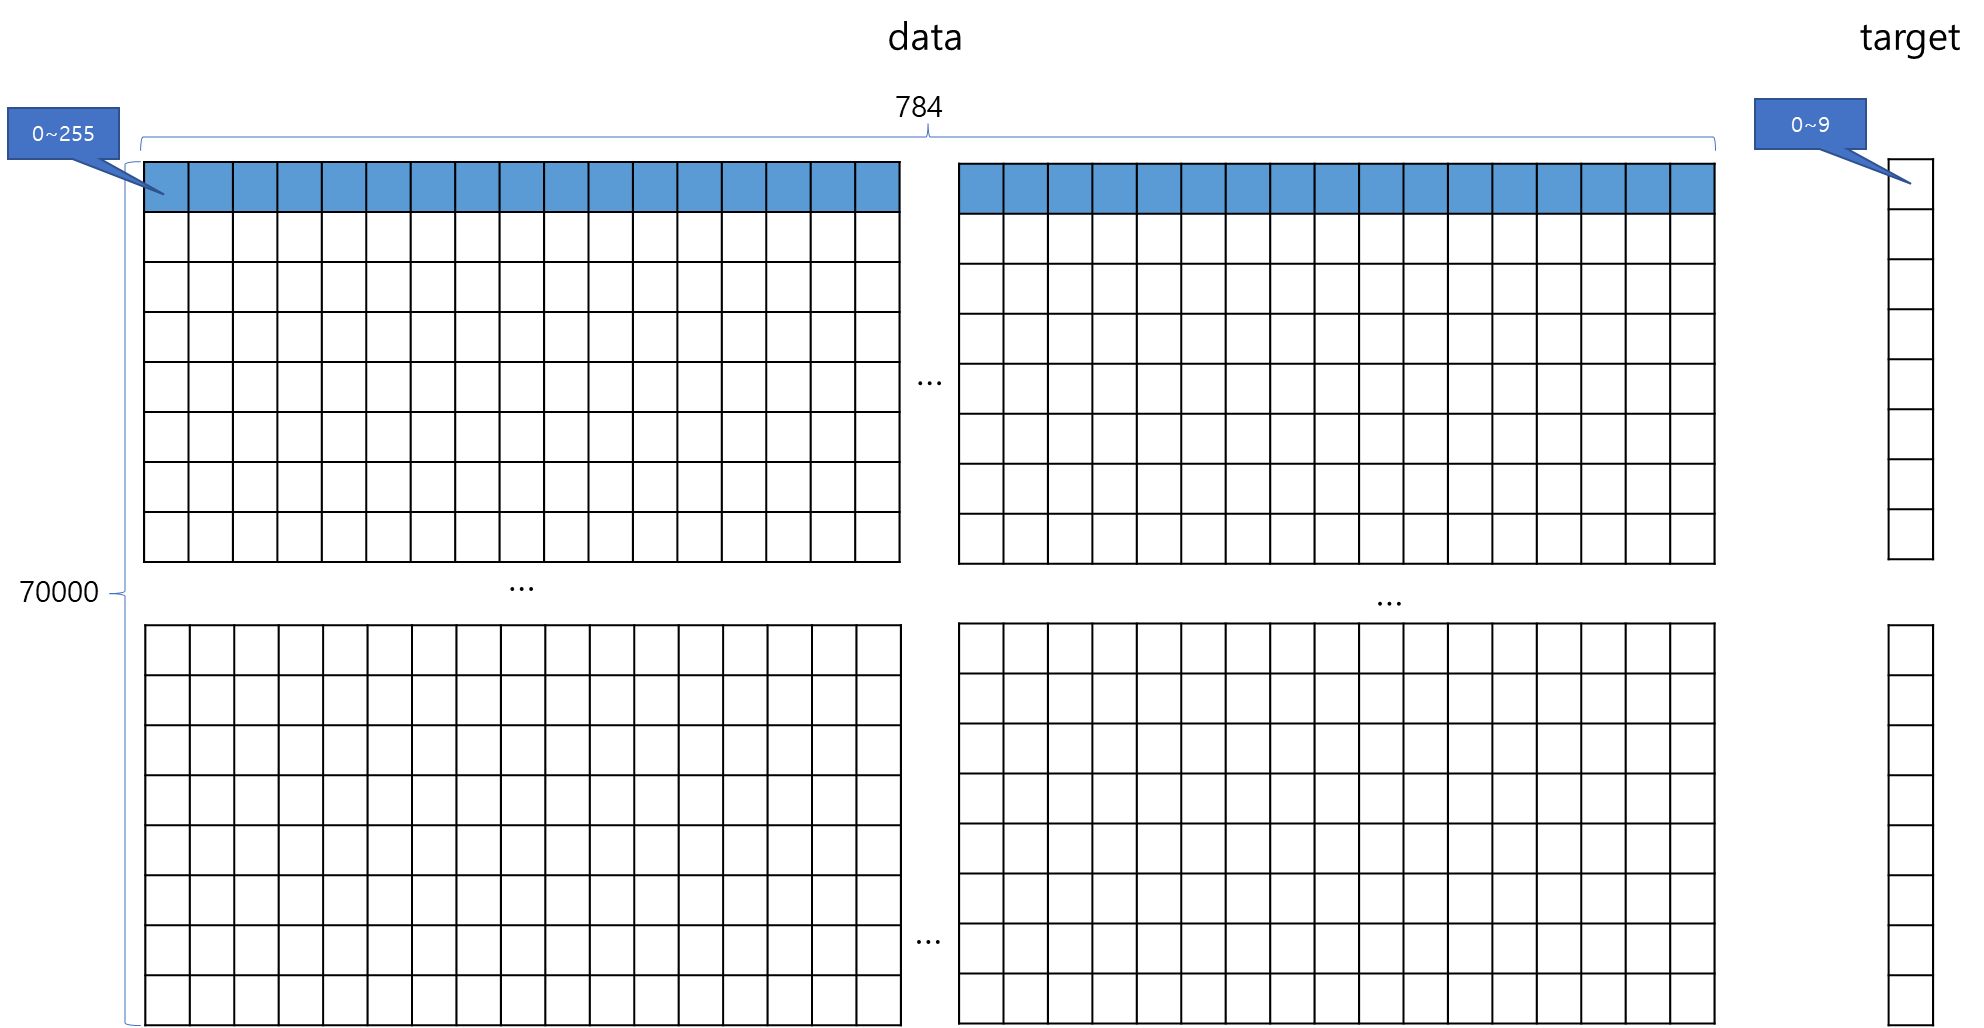

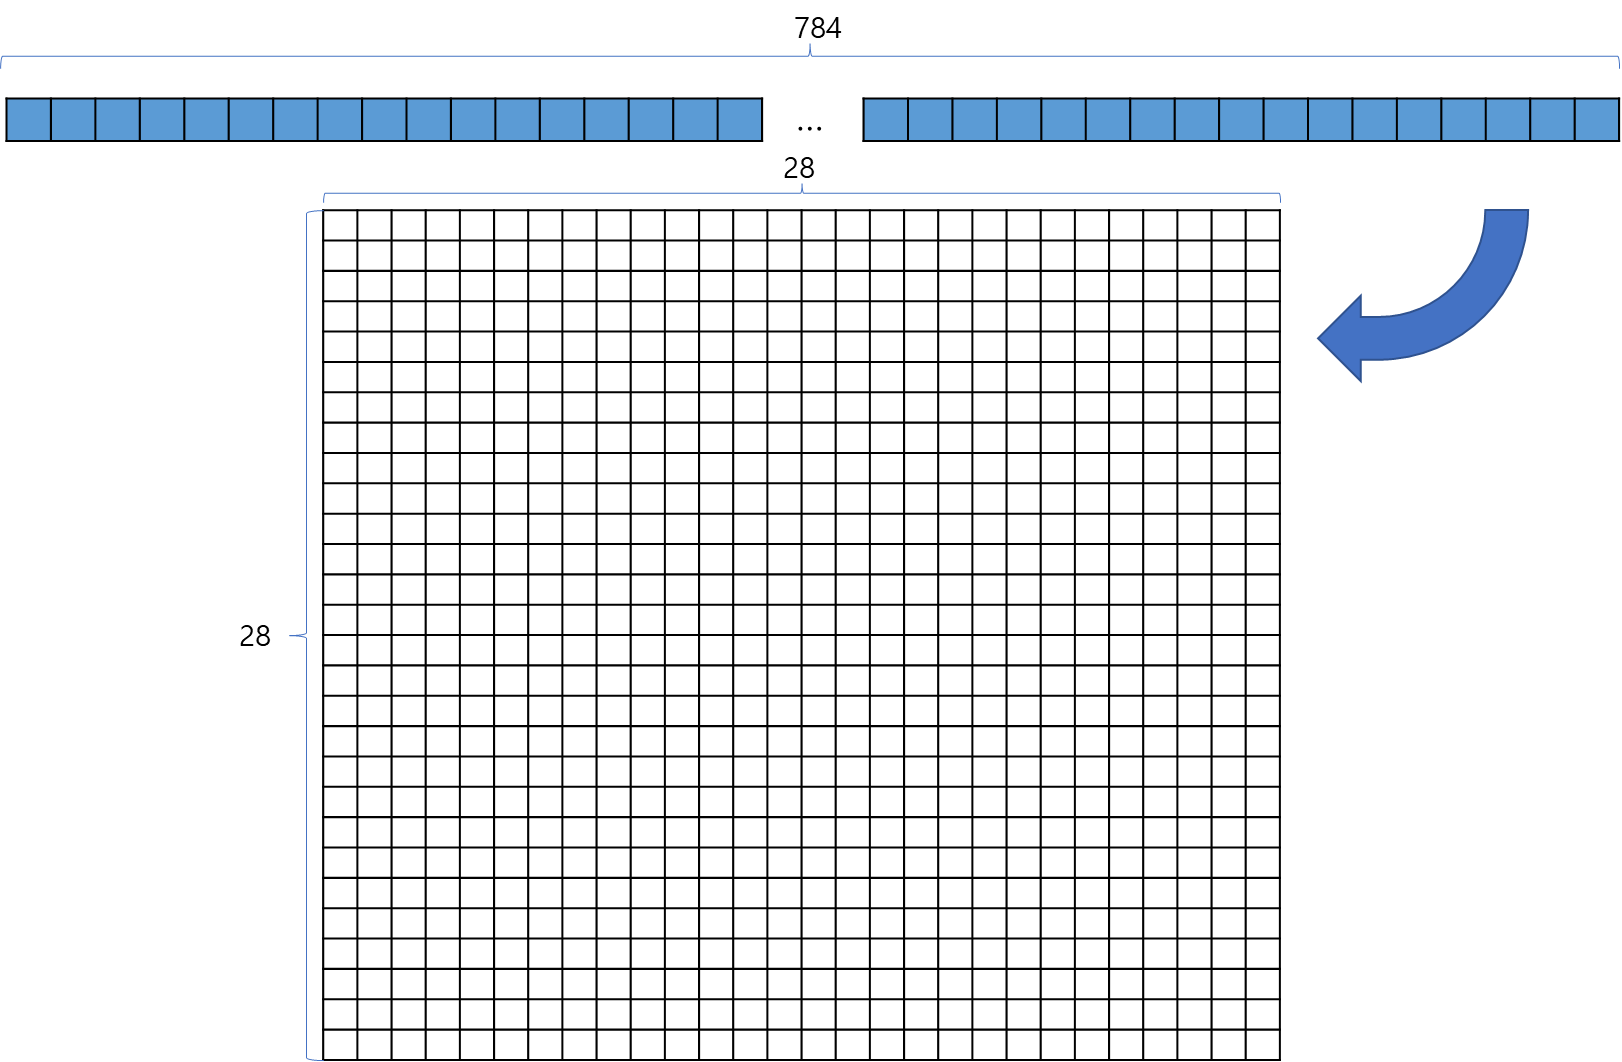

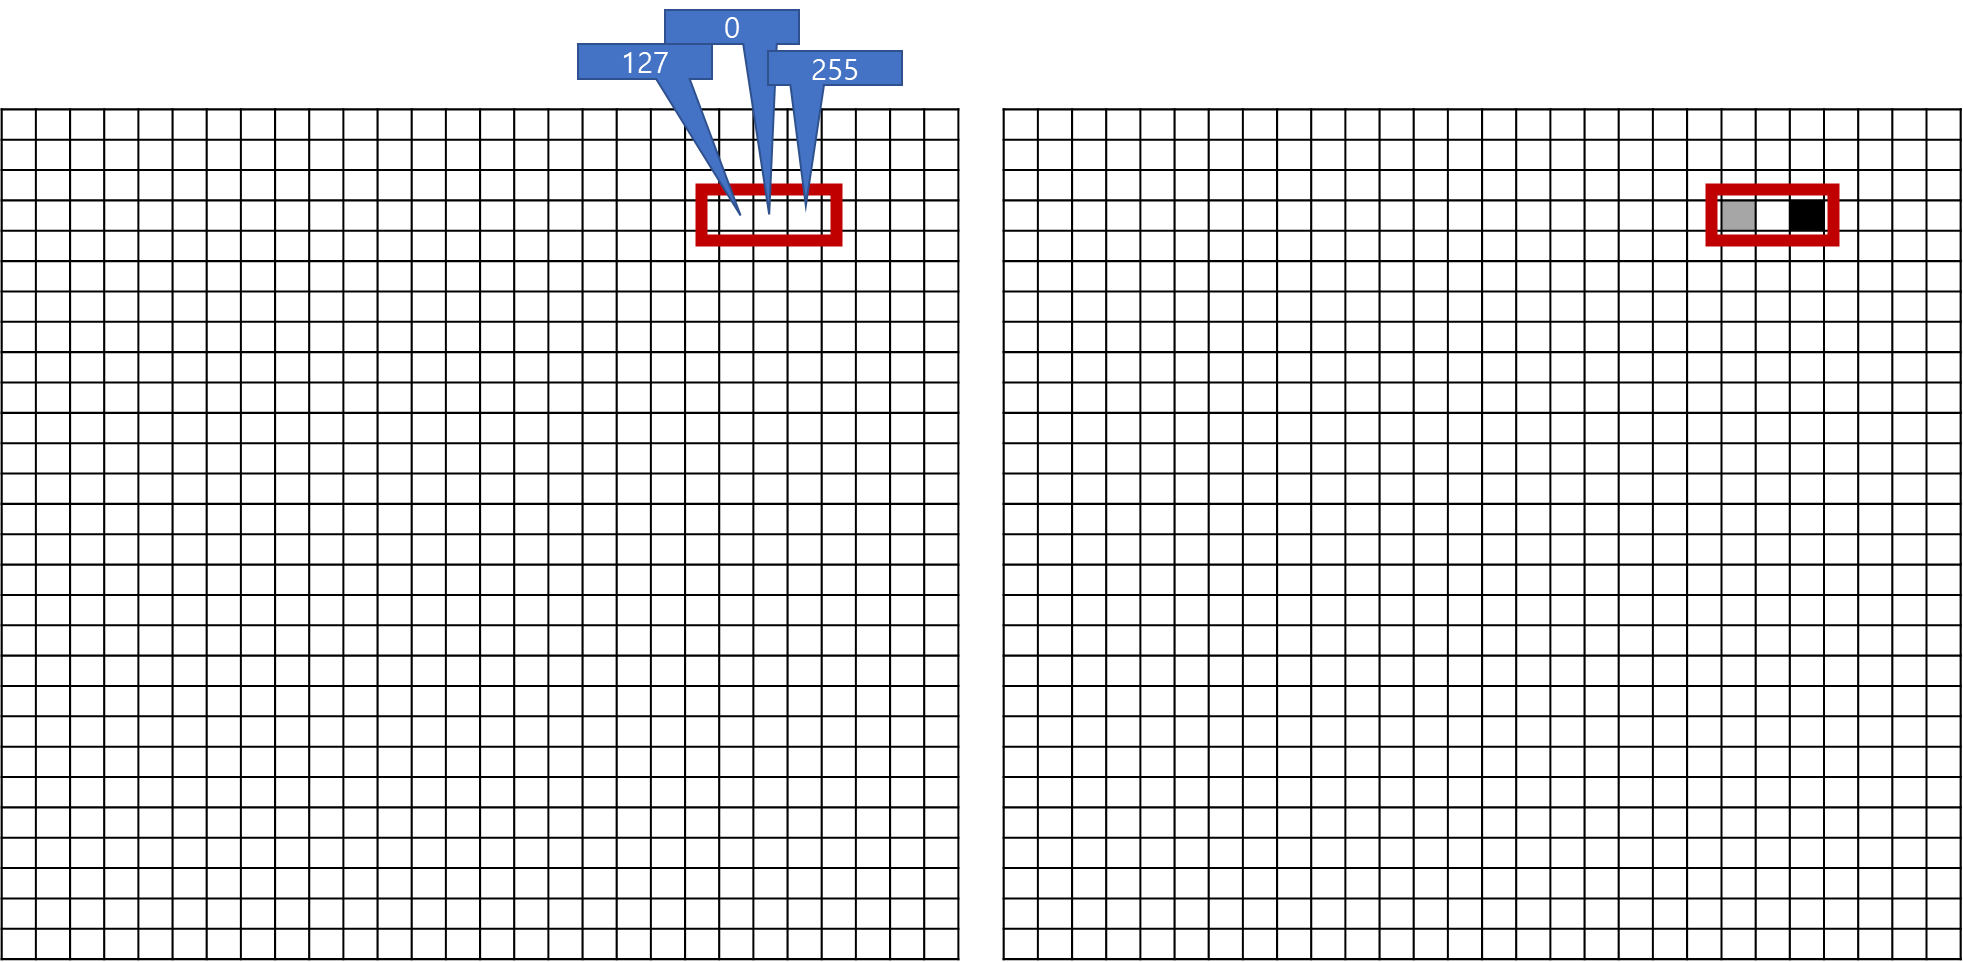

In [11]:
X, y = mnist["data"], mnist["target"]
X.shape

(70000, 784)

In [12]:
y.shape

(70000,)

In [13]:
# 가로 * 세로 --> 픽셀 수
28 * 28

784

In [14]:
# 784개의 픽셀이 1열로 나열되어 있는 형태.
X[0].shape

(784,)

In [15]:
X[0]

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

In [16]:
# 28 * 28 차원으로 변환.
X[0].reshape(28, 28)    # convert the sample into 28 rows * 28 columns

array([[  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0

In [17]:
X[0].reshape(28, 28).shape

(28, 28)

Saving figure some_digit_plot


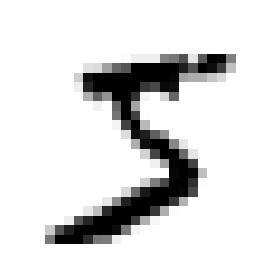

In [18]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

some_digit = X[0]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap=mpl.cm.binary)
plt.axis("off")                                   # 'off': Turn off axis lines and labels. Same as False.

save_fig("some_digit_plot")
plt.show()
# 0: complete white, 255: complete black

##### matplotlib.pyplot.imshow
matplotlib.pyplot.imshow(X, cmap=None, norm=None, \*, aspect=None, interpolation=None, alpha=None, vmin=None, vmax=None, origin=None, extent=None, interpolation_stage=None, filternorm=True, filterrad=4.0, resample=None, url=None, data=None, \*\*kwargs)<br>
Display data as an image, i.e., on a 2D regular raster.<br>
https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html?highlight=imshow#matplotlib.pyplot.imshow<br>
##### matplotlib.pyplot.axis
matplotlib.pyplot.axis(\*args, emit=True, \*\*kwargs)<br>
Convenience method to get or set some axis properties.<br>
https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.axis.html?highlight=axis#matplotlib.pyplot.axis

In [19]:
y[0]

'5'

In [20]:
type(y[0])

str

In [21]:
# 대부분의 머신러닝 알고리즘에서는 문자열이 아닌 숫자로 된 레이블을 기대하므로, 정수로 변환. 
y = y.astype(np.uint8)

In [22]:
type(y[0])

numpy.uint8

In [23]:
y[0]

5

In [24]:
def plot_digit(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = mpl.cm.binary,
               interpolation="nearest")
    plt.axis("off")

##### Interpolations for imshow
This example displays the difference between interpolation methods for imshow.<br>
https://matplotlib.org/stable/gallery/images_contours_and_fields/interpolation_methods.html<br>

In [25]:
# EXTRA: 여러 개의 이미지를 가로*세로 일정한 간격으로 plot하기 위한 함수를 정의.
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    # This is equivalent to n_rows = ceil(len(instances) / images_per_row):
    n_rows = (len(instances) - 1) // images_per_row + 1

    # Append empty images to fill the end of the grid, if needed:
    n_empty = n_rows * images_per_row - len(instances)
    padded_instances = np.concatenate([instances, np.zeros((n_empty, size * size))], axis=0)

    # Reshape the array so it's organized as a grid containing 28×28 images:
    image_grid = padded_instances.reshape((n_rows, images_per_row, size, size))

    # Combine axes 0 and 2 (vertical image grid axis, and vertical image axis),
    # and axes 1 and 3 (horizontal axes). We first need to move the axes that we
    # want to combine next to each other, using transpose(), and only then we
    # can reshape:
    big_image = image_grid.transpose(0, 2, 1, 3).reshape(n_rows * size,
                                                         images_per_row * size)
    # Now that we have a big image, we just need to show it:
    plt.imshow(big_image, cmap = mpl.cm.binary, **options)
    plt.axis("off")

Saving figure more_digits_plot


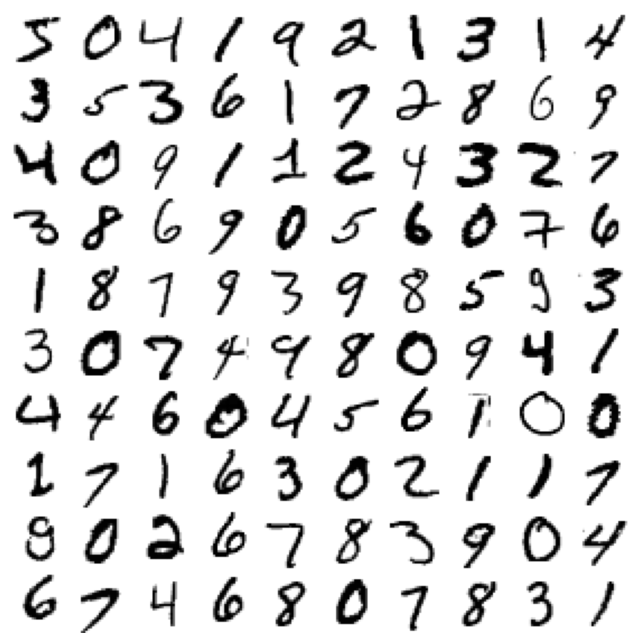

In [26]:
# 전체 이미지 중 100개의 이미지를 10 * 10으로 표시.
plt.figure(figsize=(9,9))
example_images = X[:100]
plot_digits(example_images, images_per_row=10)
save_fig("more_digits_plot")
plt.show()

In [27]:
# 이미지를 training / test set으로 분리.
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [28]:
len(X_train), len(X_test)

(60000, 10000)

# 3.2 Training a Binary Classifier (2진 분류기)

In [29]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [30]:
# Prepare dataset for the classification of 5 and non-5
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

In [31]:
# target variable의 값을 확인.
y_train_5

array([ True, False, False, ...,  True, False, False])

In [32]:
# y_train의 값이 5일 때 True(1), 5가 아닐 때 False(0)임을 확인할 수 있음.
y_train, y_train == 5

(array([5, 0, 4, ..., 5, 6, 8], dtype=uint8),
 array([ True, False, False, ...,  True, False, False]))

In [33]:
# y_train의 값이 5일 때 True(1), 5가 아닐 때 False(0)임을 확인할 수 있음.
# 10(0~9) 클래스 중 하나의 값으로 분류하는 것이 아니라, '5' 클래스와 '5 아님' 클래스로 분류하는 문제! --> Binary Classifier
np.c_[y_train, (y_train == 5)][:10]

array([[5, 1],
       [0, 0],
       [4, 0],
       [1, 0],
       [9, 0],
       [2, 0],
       [1, 0],
       [3, 0],
       [1, 0],
       [4, 0]], dtype=uint8)

In [34]:
# 784개의 feature(predictor)로부터 True / False를 학습시키기 위한 데이터.
X_train.shape, y_train_5.shape

((60000, 784), (60000,))

**Note**: some hyperparameters will have a different defaut value in future versions of Scikit-Learn, such as `max_iter` and `tol`. To be future-proof, we explicitly set these hyperparameters to their future default values. For simplicity, this is not shown in the book.

In [35]:
from sklearn.linear_model import SGDClassifier

# tol=1e-3 언제까지 해라 기준을 잡음 

sgd_clf = SGDClassifier(max_iter=1000, tol=1e-3, random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

##### sklearn.linear_model.SGDClassifier
class sklearn.linear_model.SGDClassifier(loss='hinge', \*, penalty='l2', alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=1000, tol=0.001, shuffle=True, verbose=0, epsilon=0.1, n_jobs=None, random_state=None, learning_rate='optimal', eta0=0.0, power_t=0.5, early_stopping=False, validation_fraction=0.1, n_iter_no_change=5, class_weight=None, warm_start=False, average=False)<br>
Linear classifiers (SVM, logistic regression, etc.) with SGD training.<br>
<b>max_iter: int, default=1000</b><br>
The maximum number of passes over the training data (aka epochs). It only impacts the behavior in the fit method, and not the partial_fit method.<br>
<b>tol: float, default=1e-3</b><br>
The stopping criterion. If it is not None, training will stop when (loss > best_loss - tol) for n_iter_no_change consecutive epochs. Convergence is checked against the training loss or the validation loss depending on the early_stopping parameter.<br>
<b>fit(X, y, coef_init=None, intercept_init=None, sample_weight=None)</b><br>
Fit linear model with Stochastic Gradient Descent.<br>
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html?highlight=sgdclassifier#sklearn.linear_model.SGDClassifier<br>

In [36]:
some_digit # X[0] --> y[0]: 5

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

In [37]:
sgd_clf.predict([some_digit])

array([ True])

In [38]:
# 3-fold Cross-Validation을 통해 모형 학습.
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")  # 'accuracy'에 대해서는 아래에서 설명!

array([0.95035, 0.96035, 0.9604 ])

# 3.3. Performance Measures (성능 측정 지표)

## 3.3.1 Measuring Accuracy Using Cross-Validation (교차 검증을 이용한 정확도 측정)

In [39]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone
import pandas as pd

# stratified 3-fold cross-validation: 3번의 교차 검증 시행, 각 교차 검증에 사용되는 데이터셋은 원본과 동일한 클래스 비율을 갖게 됨
skfolds = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

for train_index, val_index in skfolds.split(X_train, y_train_5):
    print(train_index)
    print(val_index)
    clone_clf = clone(sgd_clf)
    X_train_fold = X_train[train_index]
    y_train_fold = y_train_5[train_index]
    X_val_fold = X_train[val_index]
    y_val_fold = y_train_5[val_index]
    print(np.unique(y_train_5, return_counts=True))
    print(np.unique(y_train_fold, return_counts=True))
    print(np.unique(y_val_fold, return_counts=True))
    print(np.unique(y_train_5, return_counts=True)[1]/len(y_train_5))
    print(np.unique(y_train_fold, return_counts=True)[1]/len(y_train_fold))
    print(np.unique(y_val_fold, return_counts=True)[1]/len(y_val_fold))
    #print("y_train_5:\n", pd.DataFrame(y_train_5).value_counts()/len(y_train_5))
    #print("y_train_fold:\n", pd.DataFrame(y_train_fold).value_counts()/len(y_train_fold))
    #print("y_val_fold:\n", pd.DataFrame(y_val_fold).value_counts()/len(y_val_fold))

    clone_clf.fit(X_train_fold, y_train_fold)
    y_pred = clone_clf.predict(X_val_fold)
    n_correct = sum(y_pred == y_val_fold)
    print(n_correct / len(y_pred))

[    1     3     4 ... 59994 59996 59998]
[    0     2     6 ... 59995 59997 59999]
(array([False,  True]), array([54579,  5421]))
(array([False,  True]), array([36386,  3614]))
(array([False,  True]), array([18193,  1807]))
[0.90965 0.09035]
[0.90965 0.09035]
[0.90965 0.09035]
0.9669
[    0     2     3 ... 59997 59998 59999]
[    1    10    11 ... 59988 59989 59991]
(array([False,  True]), array([54579,  5421]))
(array([False,  True]), array([36386,  3614]))
(array([False,  True]), array([18193,  1807]))
[0.90965 0.09035]
[0.90965 0.09035]
[0.90965 0.09035]
0.91625
[    0     1     2 ... 59995 59997 59999]
[    3     4     5 ... 59994 59996 59998]
(array([False,  True]), array([54579,  5421]))
(array([False,  True]), array([36386,  3614]))
(array([False,  True]), array([18193,  1807]))
[0.90965 0.09035]
[0.90965 0.09035]
[0.90965 0.09035]
0.96785


##### sklearn.model_selection.StratifiedKFold
class sklearn.model_selection.StratifiedKFold(n_splits=5, \*, shuffle=False, random_state=None)<br>
Stratified K-Folds cross-validator.<br>
<b>Notes</b><br>
The implementation is designed to:<br>
Generate test sets such that all contain the same distribution of classes, or as close as possible.<br>
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html?highlight=stratifiedkfold#sklearn.model_selection.StratifiedKFold<br>

##### sklearn.base.clone
sklearn.base.clone(estimator, \*, safe=True)<br>
Construct a new unfitted estimator with the same parameters.<br>
https://scikit-learn.org/stable/modules/generated/sklearn.base.clone.html?highlight=clone#sklearn.base.clone<br>

##### numpy.unique
numpy.unique(ar, return_index=False, return_inverse=False, return_counts=False, axis=None)<br>
Find the unique elements of an array.<br>
https://numpy.org/doc/stable/reference/generated/numpy.unique.html?highlight=unique#numpy.unique<br>

In [40]:
X_train.shape

(60000, 784)

In [41]:
y_train_5.shape

(60000,)

In [42]:
skfolds

StratifiedKFold(n_splits=3, random_state=42, shuffle=True)

**Note**: `shuffle=True` was omitted by mistake in previous releases of the book.

In [43]:
# 모든 이미지를 '5 아님'으로 분류하는 2진분류기를 생성:
from sklearn.base import BaseEstimator
class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)  # len(X) 개의 False를 반환

##### numpy.zeros
numpy.zeros(shape, dtype=float, order='C', \*, like=None)<br>
Return a new array of given shape and type, filled with zeros.<br>
https://numpy.org/doc/stable/reference/generated/numpy.zeros.html?highlight=zeros#numpy.zeros<br>

In [44]:
# (10, 1) 차원의 배열에 0을 채워서 반환.
np.zeros((10, 1), dtype=bool)

array([[False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False]])

In [45]:
# (0~9의 분포가 균일하다면) 대략 이미지의 10% 정도는 5이므로, '5가 아님'으로 예측 시 적중률은 90%정도임.
# 앞에서 학습된 (높은 정확도(92~97%)를 갖는) 모형이 좋은 모형이라고 높다고 할 수 있을까요?
# --> (특히, 클래스의 분포가 불균형한 데이터셋의 경우) 정확도 지표의 한계! (애매한 경우, 많은 수를 차지하는 클래스로 예측하면 높은 정확도를 갖게 됨.)
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.91125, 0.90855, 0.90915])

**Warning**: this output (and many others in this notebook and other notebooks) may differ slightly from those in the book. Don't worry, that's okay! There are several reasons for this:
* first, Scikit-Learn and other libraries evolve, and algorithms get tweaked a bit, which may change the exact result you get. If you use the latest Scikit-Learn version (and in general, you really should), you probably won't be using the exact same version I used when I wrote the book or this notebook, hence the difference. I try to keep this notebook reasonably up to date, but I can't change the numbers on the pages in your copy of the book.
* second, many training algorithms are stochastic, meaning they rely on randomness. In principle, it's possible to get consistent outputs from a random number generator by setting the seed from which it generates the pseudo-random numbers (which is why you will see `random_state=42` or `np.random.seed(42)` pretty often). However, sometimes this does not suffice due to the other factors listed here.
* third, if the training algorithm runs across multiple threads (as do some algorithms implemented in C) or across multiple processes (e.g., when using the `n_jobs` argument), then the precise order in which operations will run is not always guaranteed, and thus the exact result may vary slightly.
* lastly, other things may prevent perfect reproducibility, such as Python dicts and sets whose order is not guaranteed to be stable across sessions, or the order of files in a directory which is also not guaranteed.

## 3.3.2 Confusion Matrix (오차 행렬)

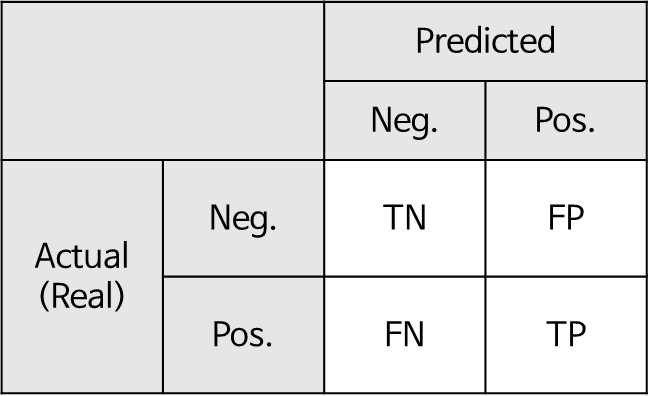

In [46]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

##### sklearn.model_selection.cross_val_predict
sklearn.model_selection.cross_val_predict(estimator, X, y=None, \*, groups=None, cv=None, n_jobs=None, verbose=0, fit_params=None, pre_dispatch='2\*n_jobs', method='predict')<br>
Generate cross-validated estimates for each input data point.<br>
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_predict.html?highlight=cross_val_predict#sklearn.model_selection.cross_val_predict<br>

In [47]:
y_train_pred

array([ True, False, False, ...,  True, False, False])

In [48]:
y_train_pred.shape

(60000,)

In [49]:
np.c_[y_train_5, y_train_pred][:20]

array([[ True,  True],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [ True, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False]])

In [50]:
# [ True, False] >> False Negative >> False로 예측했는데 틀렸을때 >> 이건 공부 필요

In [51]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train_5, y_train_pred)

array([[53892,   687],
       [ 1891,  3530]])

In [52]:
# 완벽한 분류기가 만들어진 경우의 confusion matrix
y_train_perfect_predictions = y_train_5  # pretend we reached perfection
confusion_matrix(y_train_5, y_train_perfect_predictions)

array([[54579,     0],
       [    0,  5421]])

## 3.3.3 Precision and Recall (정밀도와 재현율)

##### sklearn.metrics.precision_score
sklearn.metrics.precision_score(y_true, y_pred, \*, labels=None, pos_label=1, average='binary', sample_weight=None, zero_division='warn')<br>
Compute the precision.<br>
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html?highlight=precision_score#sklearn.metrics.precision_score<br>

##### sklearn.metrics.recall_score
sklearn.metrics.recall_score(y_true, y_pred, \*, labels=None, pos_label=1, average='binary', sample_weight=None, zero_division='warn')<br>
Compute the recall.<br>
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html?highlight=recall#sklearn.metrics.recall_score<br>

In [53]:
from sklearn.metrics import precision_score, recall_score

precision_score(y_train_5, y_train_pred)

0.8370879772350012

In [54]:
cm = confusion_matrix(y_train_5, y_train_pred)
cm[1, 1] / (cm[0, 1] + cm[1, 1])

0.8370879772350012

In [55]:
recall_score(y_train_5, y_train_pred)

0.6511713705958311

In [56]:
cm[1, 1] / (cm[1, 0] + cm[1, 1])

0.6511713705958311

In [57]:
from sklearn.metrics import f1_score

f1_score(y_train_5, y_train_pred)

0.7325171197343846

In [58]:
cm[1, 1] / (cm[1, 1] + (cm[1, 0] + cm[0, 1]) / 2)

0.7325171197343847

##### sklearn.metrics.f1_score
sklearn.metrics.f1_score(y_true, y_pred, \*, labels=None, pos_label=1, average='binary', sample_weight=None, zero_division='warn')<br>
Compute the F1 score, also known as balanced F-score or F-measure.<br>
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html?highlight=f1_score<br>

https://datascienceschool.net/03%20machine%20learning/09.04%20%EB%B6%84%EB%A5%98%20%EC%84%B1%EB%8A%A5%ED%8F%89%EA%B0%80.html?highlight=roc#:~:text=F%EC%A0%90%EC%88%98%C2%B6,recall/(precision%2Brecall)

How to Remember?
  P
R 
\T /F |N |P

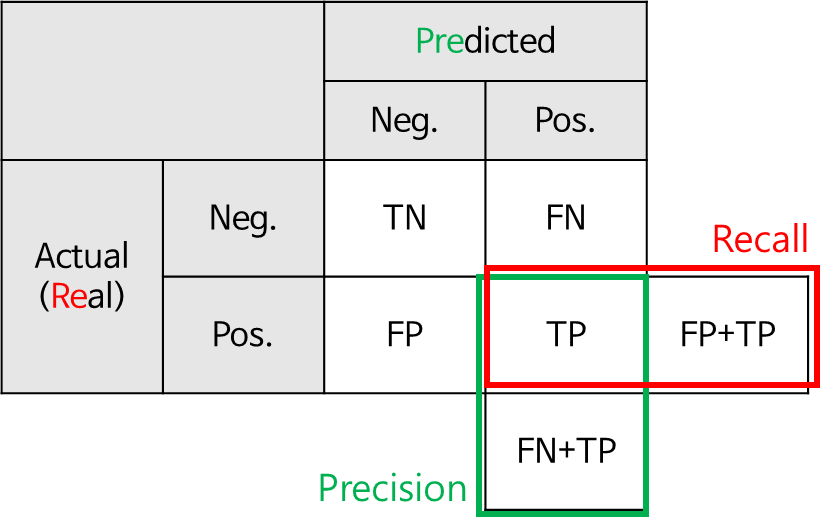

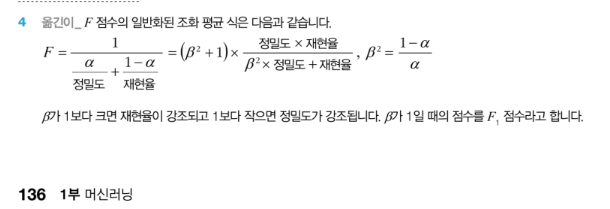

정밀도: 참이라 예측한 것 중에 얼마나 참인가?<br>
재현율: 참 중에 얼마나 참으로 예측했는가?<br>

## 3.3.4 Precision/Recall Trade-off (정밀도/재현율 트레이드오프)

In [59]:
y_scores = sgd_clf.decision_function([some_digit])
y_scores

array([2164.22030239])

In [60]:
sgd_clf.decision_function(X[:19])  # 첫 20개의 instance들에 대해 예측점수(score)를 구한 결과
# Plus 값이면 True, Minus 값이면 False 

array([  2164.22030239,  -5897.37359354, -13489.14805779,  -4623.84515943,
        -6873.05248453,  -3908.27576291,  -4851.9422397 ,  -4988.52407755,
        -2226.78132866,  -4081.33692831,  -5711.47789687,   4742.52813158,
       -10322.61970087,  -5028.5080424 ,  -2774.48933701,  -4757.62175338,
        -7995.78737908,  -5478.98084419,  -2494.25572149])

In [61]:
y[:19]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5, 3, 6, 1, 7, 2, 8, 6],
      dtype=uint8)

In [62]:
sgd_clf.predict(X[:19])  # score >= 0 --> True, score < 0 --> False

array([ True, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False])

점수는 동일한 상황에서 임곗값(기본=0)을 변경하면서, Precision과 Recall이 어떻게 변하는지 살펴본다!

##### <font color='red'>임곗값의 좌측은 Negative (5), 우측은 Positive (Not 5)</font>

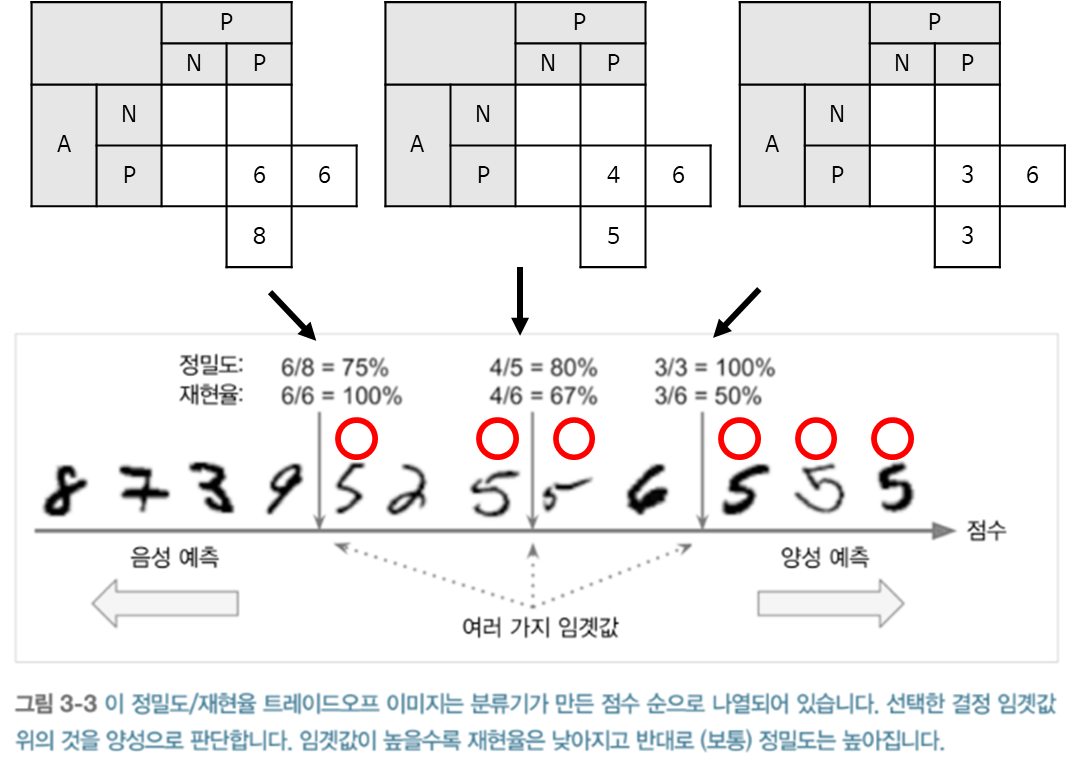

In [63]:
# 4/5 >> 위 표 숫자 보면 알수 있음 
# 선 기준으로 오른쪽을 양성으로 예측한것이기 때문에 5개, 실제 5인 빨간 동그라미는 4개이기 때문에 80%가됨

# 정밀도와 재현율이 tradeoff가 있따 

##### sklearn.linear_model.SGDClassifier
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html?highlight=sgdclassifier#:~:text=Methods-,decision_function(X),Predict%20confidence%20scores%20for%20samples.,-densify()

In [64]:
some_digit

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

In [65]:
# 동일한 decision_function 값이라도, 임곗값에 따라 분류 결과는 달라짐.
threshold = 0
y_some_digit_pred = (y_scores > threshold)

In [66]:
y_some_digit_pred

array([ True])

In [67]:
# 동일한 decision_function 값이라도, 임곗값에 따라 분류 결과는 달라짐.
threshold = 8000
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([False])

In [68]:
# method 파라미터를 변경하여 분류결과가 아닌 분류점수를 확인할 수 있음.
# 즉, True일 확률이 크다고 판단하면 높은 점수, 아니면 낮은 점수를 반환하게 됨.
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3,
                             method="decision_function")

##### sklearn.model_selection.cross_val_predict
sklearn.model_selection.cross_val_predict(estimator, X, y=None, *, groups=None, cv=None, n_jobs=None, verbose=0, fit_params=None, pre_dispatch='2*n_jobs', method='predict')<br>
Generate cross-validated estimates for each input data point.<br>
<b>method{‘predict’, ‘predict_proba’, ‘predict_log_proba’, ‘decision_function’}, default=’predict’</b><br>
The method to be invoked by estimator.<br>
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_predict.html?highlight=cross_val_predict#:~:text=method%7B%E2%80%98predict%E2%80%99%2C%20%E2%80%98predict_proba,invoked%20by%20estimator.<br>

In [69]:
y_scores

array([  1200.93051237, -26883.79202424, -33072.03475406, ...,
        13272.12718981,  -7258.47203373, -16877.50840447])

In [70]:
# Reminder: 앞서 실행한 코드는 아래와 같으며, 그 결과는 True / False였음.
# 즉, decision_function의 반환값이 0보다 크면 True, 그렇지 않으면 False값을 반환받았음.
#y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)
y_train_pred

array([ True, False, False, ...,  True, False, False])

In [71]:
# 이하의 내용에 대해서는 두 성능지표 간에 트레이드오프 관계가 있다는 것만 이해하면 됩니다.
# 상세한 코드는 몰라도 괜찮고, 그 성능지표 간의 관계를 Plot한 그림을 보고 이해하실 수 있으면 됩니다.
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

##### sklearn.metrics.precision_recall_curve
sklearn.metrics.precision_recall_curve(y_true, probas_pred, \*, pos_label=None, sample_weight=None)<br>
Compute precision-recall pairs for different probability thresholds.<br>
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_recall_curve.html?highlight=precision_recall_curve#sklearn.metrics.precision_recall_curve<br>

Saving figure precision_recall_vs_threshold_plot


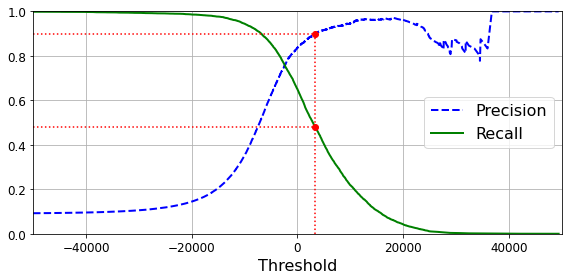

In [72]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
    plt.legend(loc="center right", fontsize=16) # Not shown in the book
    plt.xlabel("Threshold", fontsize=16)        # Not shown
    plt.grid(True)                              # Not shown
    plt.axis([-50000, 50000, 0, 1])             # Not shown


# 정밀도(precision) 0.9(90%)에 대한 재현율(recall)과 임곗값(threshold)을 계산.
recall_90_precision = recalls[np.argmax(precisions >= 0.90)]
threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)]


plt.figure(figsize=(8, 4))                                                                  # Not shown
# 앞의 코드 셀에서 precision_recall_curve()을 호출한 결과로 반환된 precisions, recalls, thresholds을 파라미터로 
# 사용자 정의 함수 plot_precision_recall_vs_threshold()를 호출.
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.plot([threshold_90_precision, threshold_90_precision], [0., 0.9], "r:")                 # Not shown
plt.plot([-50000, threshold_90_precision], [0.9, 0.9], "r:")                                # Not shown
plt.plot([-50000, threshold_90_precision], [recall_90_precision, recall_90_precision], "r:")# Not shown
plt.plot([threshold_90_precision], [0.9], "ro")                                             # Not shown
plt.plot([threshold_90_precision], [recall_90_precision], "ro")                             # Not shown
save_fig("precision_recall_vs_threshold_plot")                                              # Not shown
plt.show()

In [73]:
np.argmax(precisions >= 0.90)   # returns the first index of the max value

57075

In [74]:
precisions >= 0.90

array([False, False, False, ...,  True,  True,  True])

In [75]:
import pandas as pd
df = pd.DataFrame(precisions, columns=["precision"])
df = df[df.precision >= 0.90]
df

,precision
57075,0.900035
57076,0.900000
57079,0.900242
57080,0.900208
57081,0.900173
...,...
59962,1.000000
59963,1.000000
59964,1.000000
59965,1.000000


In [76]:
import pandas as pd
pd.DataFrame(precisions)[57070:57080]

,0
57070,0.898826
57071,0.899136
57072,0.899447
57073,0.899412
57074,0.899723
57075,0.900035
57076,0.900000
57077,0.899965
57078,0.899931
57079,0.900242


In [77]:
# method='predict'(default)의 작동원리 이해하기.
# y_scores 값이 0보다 크면 True로 
(y_train_pred == (y_scores > 0)).all()  # check if y_scores greater than 0 are all True and the others are all False
                                        # all() returns True when all are True

True

In [78]:
y_train_pred  # method='predict'에 의한 반환값

array([ True, False, False, ...,  True, False, False])

In [79]:
y_scores > 0  # method='decision_function'에 의한 반환값 --> 0과 비교하여 True / False 설정.

array([ True, False, False, ...,  True, False, False])

In [80]:
# 두 값을 서로 다른 열에 표시해서 비교해보면 일치함을 확인할 수 있음.
np.c_[y_train_pred, y_scores > 0][:10]

array([[ True,  True],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False]])

In [81]:
# 정밀도(precision) 0.9(90%)에 대한 재현율(recall)
recall_90_precision

0.4799852425751706

In [82]:
# 정밀도(precision) 0.9(90%)에 대한 임곗값(threshold)을 계산.
threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)]

In [83]:
threshold_90_precision

3370.0194991439594

In [84]:
# 정밀도 0.9 이상인 점수를 갖는 예측값(predictions)만을 추출하여 저장. 즉, 위의 plot에서 빨간색 수직선 우측 영역에 해당.
y_train_pred_90 = (y_scores >= threshold_90_precision)

In [85]:
# 실제 값과 위의 예측값을 이용해 계산한 정밀도는 0.9
precision_score(y_train_5, y_train_pred_90)

0.9000345901072293

In [86]:
# 실제 값과 위의 예측값을 이용해 계산한 재현율은 0.4799852425751706 = 정밀도(precision) 0.9(90%)에 대한 재현율(recall)과 일치
recall_score(y_train_5, y_train_pred_90)

0.4799852425751706

Saving figure precision_vs_recall_plot


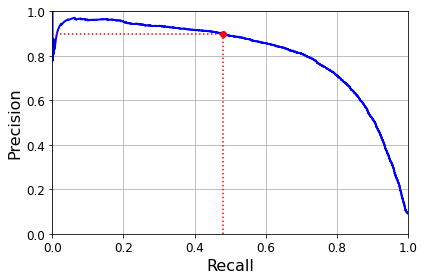

In [87]:
# 정밀도(precision)와 재현율(recall) 간의 관계를 plot에 표시하는 함수를 정의.
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b-", linewidth=2)
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0, 1, 0, 1])
    plt.grid(True)

plt.figure(figsize=(6, 4))
plot_precision_vs_recall(precisions, recalls)
# plot [X0, X1], [Y0, Y1] --> line between (X0, Y0) and (X1, Y1)
plt.plot([recall_90_precision, recall_90_precision], [0., 0.9], "r:")   # X0 = X1 vertical red line
plt.plot([0.0, recall_90_precision], [0.9, 0.9], "r:")                  # Y0 = Y1 horizontal red line
plt.plot([recall_90_precision], [0.9], "ro")                            # red point on the blue line
save_fig("precision_vs_recall_plot")
plt.show()

## 3.3.5 The ROC Curve

In [88]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)   # parameters: actual(real) y, predicted y

##### sklearn.metrics.roc_curve
sklearn.metrics.roc_curve(y_true, y_score, \*, pos_label=None, sample_weight=None, drop_intermediate=True)<br>
Compute Receiver operating characteristic (ROC).<br>
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html?highlight=roc_curve#sklearn.metrics.roc_curve<br>

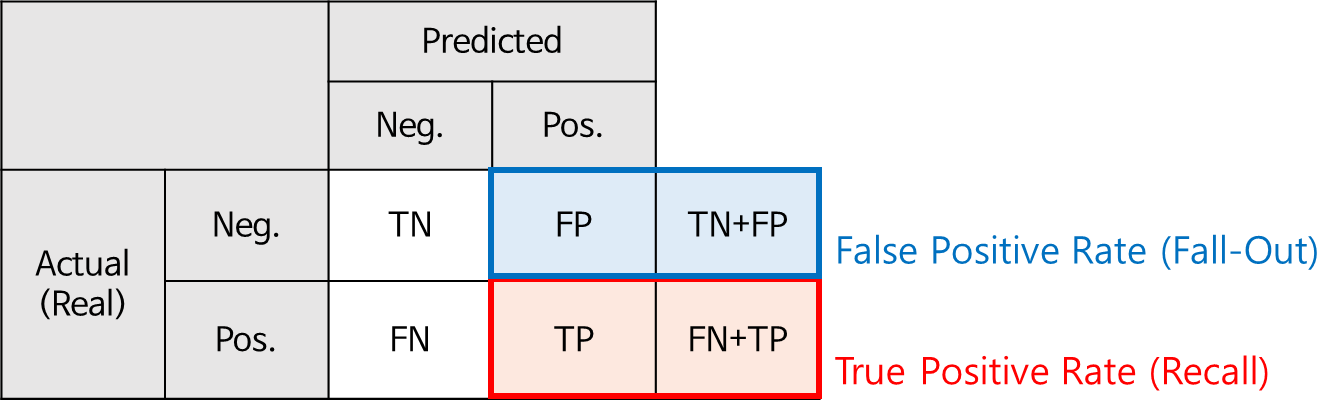

In [89]:
y_train_5

array([ True, False, False, ...,  True, False, False])

In [90]:
y_scores

array([  1200.93051237, -26883.79202424, -33072.03475406, ...,
        13272.12718981,  -7258.47203373, -16877.50840447])

In [91]:
df = pd.DataFrame(np.c_[y_train_5, y_scores], columns=['actual', 'score']).sort_values(by=['score'], axis=0).reset_index()
df["actual"] = df["actual"].astype('bool')
df

,index,actual,score
0,40394,False,-146348.567262
1,49838,False,-142300.007054
2,54403,False,-137588.975817
3,22698,False,-137155.626441
4,47715,False,-136254.058562
...,...,...,...
59995,47972,True,36801.606970
59996,44923,True,37026.251165
59997,53497,True,38871.263919
59998,55161,True,42216.055628


In [92]:
# 위의 데이터에서 임곗값을 변화시켜가면서 FPR과 TPR을 계산.
# 예를 들어, 30000을 임곗값으로 정하면, 이 때 predicted값과 actual값으로부터 confusion_matrix를 작성하여 fpr, tpr을 계산할 수 있음.
# 임곗값을 변화(감소)시키면서 계산하는 과정을 반복하면, 여러 fpr값과 이에 대응하는 tpr값을 구할 수 있고, 이를 plot하면 roc 커브가 작성됨.
df["predicted"] = False
df["predicted"][df.score>=30000] = True
df["category"] = ""
df["category"][(df.actual==0)&(df.predicted==0)] = "TN"
df["category"][(df.actual==1)&(df.predicted==0)] = "FN"
df["category"][(df.actual==0)&(df.predicted==1)] = "FP"
df["category"][(df.actual==1)&(df.predicted==1)] = "TP"
df[:10]

/Users/boysbeanxious/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/Users/boysbeanxious/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/Users/boysbeanxious/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/boysbeanxious/

,index,actual,score,predicted,category
0,40394,False,-146348.567262,False,TN
1,49838,False,-142300.007054,False,TN
2,54403,False,-137588.975817,False,TN
3,22698,False,-137155.626441,False,TN
4,47715,False,-136254.058562,False,TN
5,40560,False,-132044.527135,False,TN
6,52578,False,-129170.594131,False,TN
7,27268,False,-127012.700211,False,TN
8,56210,False,-126868.790601,False,TN
9,58392,False,-126331.162183,False,TN


In [93]:
df[-10:]

,index,actual,score,predicted,category
59990,55506,True,34530.186960,True,TP
59991,46435,False,34547.447029,True,FP
59992,46597,True,34662.209500,True,TP
59993,53000,True,35261.179277,True,TP
59994,49500,False,35987.203075,True,FP
59995,47972,True,36801.606970,True,TP
59996,44923,True,37026.251165,True,TP
59997,53497,True,38871.263919,True,TP
59998,55161,True,42216.055628,True,TP
59999,47320,True,49441.437659,True,TP


In [94]:
df["category"].value_counts()

TN    54576
FN     5401
TP       20
FP        3
Name: category, dtype: int64

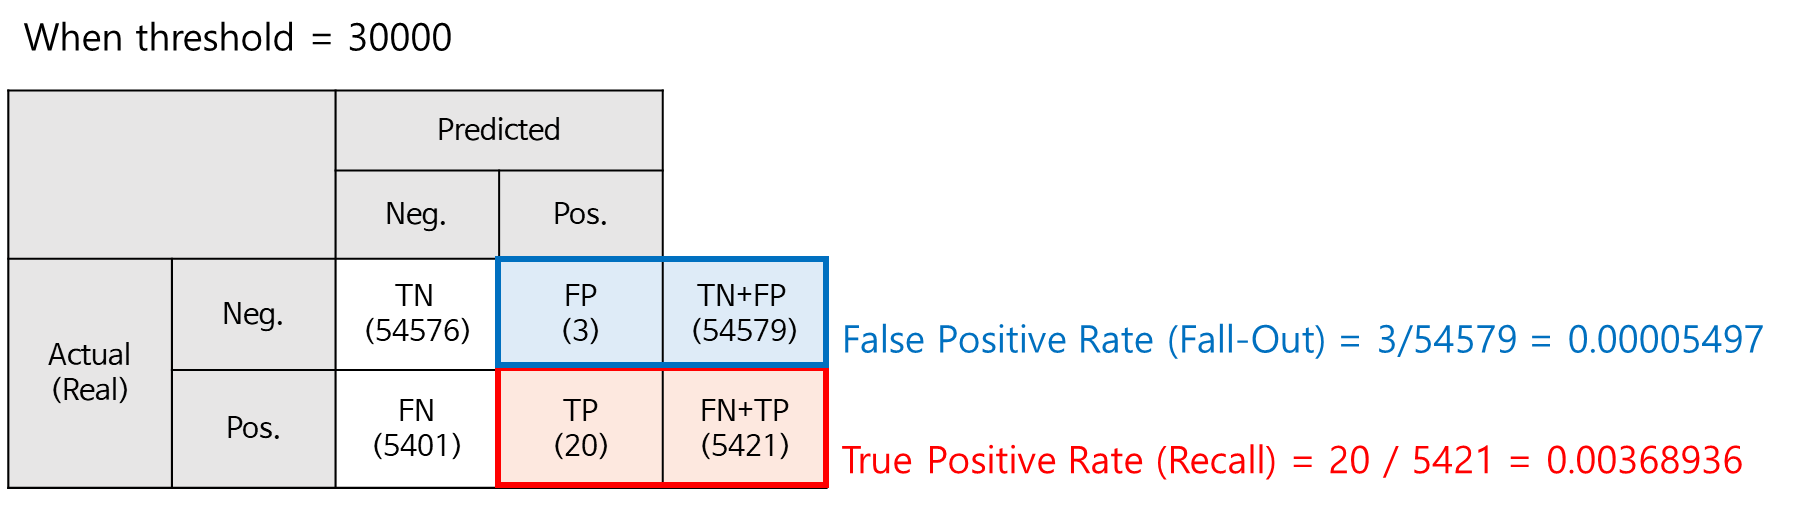

In [95]:
# 임곗값을 바꿔가면서 FPR과 TPR의 pair를 구해낼 수 있고, 이를 배열로 표시하면 아래와 같이 정리 가능.
# fpr과 이에 대응하는 tpr값을 확인.
np.c_[fpr, tpr][:20]

array([[0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 1.84467810e-04],
       [0.00000000e+00, 9.22339052e-04],
       [1.83220653e-05, 9.22339052e-04],
       [1.83220653e-05, 1.29127467e-03],
       [3.66441305e-05, 1.29127467e-03],
       [3.66441305e-05, 2.39808153e-03],
       [5.49661958e-05, 2.39808153e-03],
       [5.49661958e-05, 3.87382402e-03],
       [9.16103263e-05, 3.87382402e-03],
       [9.16103263e-05, 6.27190555e-03],
       [1.28254457e-04, 6.27190555e-03],
       [1.28254457e-04, 7.74764804e-03],
       [1.46576522e-04, 7.74764804e-03],
       [1.46576522e-04, 2.50876222e-02],
       [1.64898587e-04, 2.50876222e-02],
       [1.64898587e-04, 4.44567423e-02],
       [1.83220653e-04, 4.44567423e-02],
       [1.83220653e-04, 6.30879911e-02],
       [2.01542718e-04, 6.30879911e-02]])

Saving figure roc_curve_plot


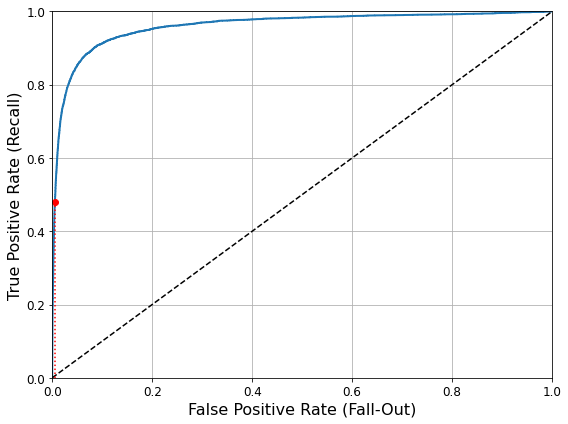

In [96]:
# fpr, tpr 값으로부터 roc 곡선을 plot하는 함수를 정의.
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
    plt.axis([0, 1, 0, 1])                                    # 
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16) # 
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)    # 
    plt.grid(True)                                            # 

plt.figure(figsize=(8, 6))                                    # 
plot_roc_curve(fpr, tpr)
fpr_90 = fpr[np.argmax(tpr >= recall_90_precision)]           # 정밀도 0.9(90%)일 때의 재현율(recall=tpr)보다 커지는 fpr 최소값을 계산.
plt.plot([fpr_90, fpr_90], [0., recall_90_precision], "r:")   # 빨간색 수직선
plt.plot([0.0, fpr_90], [recall_90_precision, recall_90_precision], "r:")  # 빨간색 수평선
plt.plot([fpr_90], [recall_90_precision], "ro")               # 빨간색 점
save_fig("roc_curve_plot")                                    # 그림으로 저장
plt.show()

In [97]:
# 가능한 한 낮은 FPR인 상황에서 높은 TPR을 가질수록 높은 성능의 모델임.
# 이는, 곡선 하부의 면적이 더 클수록 더 좋은 성능의 모델이라는 것과 동일한 의미.
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train_5, y_scores)

0.9604938554008616

##### sklearn.metrics.roc_auc_score
sklearn.metrics.roc_auc_score(y_true, y_score, \*, average='macro', sample_weight=None, max_fpr=None, multi_class='raise', labels=None)<br>
Compute Area Under the Receiver Operating Characteristic Curve (ROC AUC) from prediction scores.<br>
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html?highlight=roc_auc_score#sklearn.metrics.roc_auc_score<br>

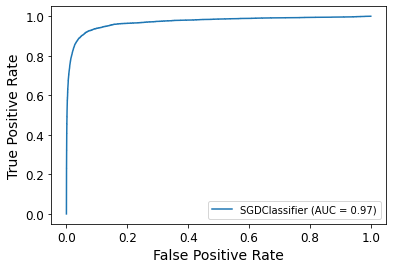

In [98]:
# ROC 커브를 그려주는 함수를 사용할 수 있음 (ver 1.2 이후 소멸 예정)
from sklearn.metrics import plot_roc_curve as prc  # 앞의 동일 함수와 다른 이름을 부여.
prc(sgd_clf, X_train, y_train_5)

In [99]:
sklearn.__version__

'0.23.2'

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.RocCurveDisplay.html?highlight=sklearn%20metric%20roccurvedisplay%20from_predictions

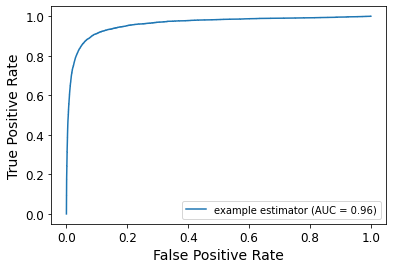

In [100]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import auc, RocCurveDisplay
roc_auc = auc(fpr, tpr)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                  estimator_name='example estimator')
display.plot()
plt.show()

**Note**: we set `n_estimators=100` to be future-proof since this will be the default value in Scikit-Learn 0.22.

In [101]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(n_estimators=100, random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3,
                                    method="predict_proba")

##### sklearn.ensemble.RandomForestClassifier
class sklearn.ensemble.RandomForestClassifier(n_estimators=100, \*, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None)<br>
A random forest classifier.<br>
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html?highlight=randomforestclassifier#sklearn.ensemble.RandomForestClassifier<br>

In [102]:
# 각 열은 각 클래스에 속할 확률을 의미. 각각 0(False)과 1(True)에 해당
y_probas_forest # probability of 0 and 1

array([[0.11, 0.89],
       [0.99, 0.01],
       [0.96, 0.04],
       ...,
       [0.02, 0.98],
       [0.92, 0.08],
       [0.94, 0.06]])

In [103]:
# 1열이 True값의 확률에 해당하므로 1열을 점수로 저장.
y_scores_forest = y_probas_forest[:, 1] # score = probability of positive class
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5, y_scores_forest)   # actual(real) y, predicted y

In [104]:
y_scores_forest

array([0.89, 0.01, 0.04, ..., 0.98, 0.08, 0.06])

In [105]:
y_train_5

array([ True, False, False, ...,  True, False, False])

Saving figure roc_curve_comparison_plot


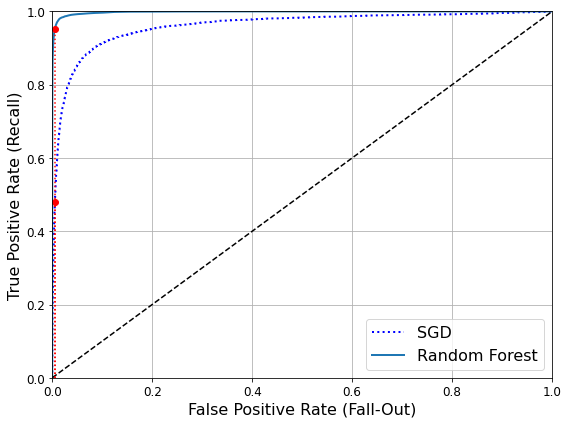

In [106]:
recall_for_forest = tpr_forest[np.argmax(fpr_forest >= fpr_90)]

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, "b:", linewidth=2, label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.plot([fpr_90, fpr_90], [0., recall_90_precision], "r:")
plt.plot([0.0, fpr_90], [recall_90_precision, recall_90_precision], "r:")
plt.plot([fpr_90], [recall_90_precision], "ro")
plt.plot([fpr_90, fpr_90], [0., recall_for_forest], "r:")
plt.plot([fpr_90], [recall_for_forest], "ro")
plt.grid(True)
plt.legend(loc="lower right", fontsize=16)
save_fig("roc_curve_comparison_plot")
plt.show()

In [107]:
# 본 데이터의 경우, RandomForestClassifier 모델이 SGDClassifier 모델(0.9604938554008616)에 비해 (AUC를 기준으로) 더 높은 성능을 보임.
roc_auc_score(y_train_5, y_scores_forest)

0.9983436731328145

In [108]:
y_train_pred_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3)
precision_score(y_train_5, y_train_pred_forest)

0.9905083315756169

In [109]:
recall_score(y_train_5, y_train_pred_forest)

0.8662608374838591

In [110]:
f1_score(y_train_5, y_train_pred_forest)

0.9242275142688446

In [111]:
f1_score(y_train_5, y_train_pred)

0.7325171197343846

##### sklearn.metrics.f1_score
sklearn.metrics.f1_score(y_true, y_pred, \*, labels=None, pos_label=1, average='binary', sample_weight=None, zero_division='warn')<br>
Compute the F1 score, also known as balanced F-score or F-measure.<br>
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html?highlight=f1_score<br>

# 3.4 Multiclass Classification (다중 분류)

In [112]:
from sklearn.svm import SVC

svm_clf = SVC(gamma="auto", random_state=42)
svm_clf.fit(X_train[:1000], y_train[:1000]) # y_train, not y_train_5
svm_clf.predict([some_digit])

array([5], dtype=uint8)

##### sklearn.svm.SVC
class sklearn.svm.SVC(\*, C=1.0, kernel='rbf', degree=3, gamma='scale', coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=- 1, decision_function_shape='ovr', break_ties=False, random_state=None)<br>
C-Support Vector Classification.<br>
https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html?highlight=svc#sklearn.svm.SVC<br>

In [113]:
# 어떤 클래스에 얼마나 분포되어 있는지 확인. 이제 '5'와 '5 아님'을 구분하는 것이 아니므로, 10개의 클래스를 모두 사용하여 학습.
pd.DataFrame(y_train).value_counts()

1    6742
7    6265
3    6131
2    5958
9    5949
0    5923
6    5918
8    5851
4    5842
5    5421
dtype: int64

In [114]:
# some_digit(class=5)에 대해 모델이 각 클래스 별로 부여한 점수(score, decision_function의 반환값)를 계산.
# class=5에 대해 최대의 값을 부여했으며, 그 다음으로 7이 높다는 것을 알 수 있음.
some_digit_scores = svm_clf.decision_function([some_digit])
some_digit_scores

array([[ 2.81585438,  7.09167958,  3.82972099,  0.79365551,  5.8885703 ,
         9.29718395,  1.79862509,  8.10392157, -0.228207  ,  4.83753243]])

In [115]:
# score가 가장 높은 인덱스는 5
# 주의: 인덱스의 번호가 5인 것이며, 이것만으로는 클래스가 5임을 확인한 것이 아님. 우연히, 인덱스와 클래스가 같아진 것뿐.
np.argmax(some_digit_scores)

5

In [116]:
# 모델이 학습한 모든 클래스를 확인.
svm_clf.classes_    # this model has 1 estimator with 10 classes

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [117]:
# 인덱스 5에 해당하는 클래스는 5
svm_clf.classes_[5]

5

In [118]:
# 10개의 클래스에 대해 10개의 분류기(classifier)를 훈련.
# 각 분류기는 특정한 하나의 클래스만을 분류하는 기능을 수행: 앞서 살펴본 것처럼 '5'와 '5 아님'으로 분류하는 분류기가 0~9까지 10개 존재.
# 즉, classifier 0: 0 or others? classifer 1: 1 or others? ... classifier 9: 9 or others?
from sklearn.multiclass import OneVsRestClassifier
ovr_clf = OneVsRestClassifier(SVC(gamma="auto", random_state=42))  # SVC 분류기를 데이터에 포함된 클래스 수만큼 갖는 모델을 생성!
ovr_clf.fit(X_train[:1000], y_train[:1000])
ovr_clf.predict([some_digit])

array([5], dtype=uint8)

In [119]:
# 주어진 값에 대해, 각 분류기(클래스 별로 할당된)가 자기가 맡은 클래스에 해당할 것 같은지, 점수를 계산한 결과를 반환할 것임 (아래와 같이).
# 이 점수들 중, 가장 높은 점수를 갖는 인덱스(5)로 분류됨.
ovr_clf.decision_function([some_digit])

array([[-0.9990256 , -0.99963766, -0.99949709, -0.99902667, -0.99986906,
         0.10132159, -0.99976287, -0.99933311, -0.99943631, -0.99924045]])

In [120]:
# 모델에 포함된 분류기의 갯수를 확인.
len(ovr_clf.estimators_)

10

In [121]:
# The model has 10 estimators.
ovr_clf.estimators_

[SVC(gamma='auto', random_state=42),
 SVC(gamma='auto', random_state=42),
 SVC(gamma='auto', random_state=42),
 SVC(gamma='auto', random_state=42),
 SVC(gamma='auto', random_state=42),
 SVC(gamma='auto', random_state=42),
 SVC(gamma='auto', random_state=42),
 SVC(gamma='auto', random_state=42),
 SVC(gamma='auto', random_state=42),
 SVC(gamma='auto', random_state=42)]

In [122]:
# And each of 10 estimators has 2 classes.
ovr_clf.estimators_[0].classes_

array([0, 1], dtype=int64)

In [123]:
# And each of 10 estimators has 2 classes.
# 즉, OneVsRestClassifier을 사용하여 모델을 만들면, SVC 분류기를 데이터에 포함된 클래스 수(10)만큼 갖는 모델이 생성됨.
for e in ovr_clf.estimators_:
    print(e.classes_)

[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]


In [124]:
# 반면, 앞의 모델은 10개의 클래스를 갖고 있음. 이 경우, One-Vs-One 전략이 적용됨.
# --> 10개의 클래스 중 가능한 모든 조합에 대해 학습 진행 (0 vs 1, 0 vs 2, ..., 1 vs 2, 1 vs 3, ..., 8 vs 9)
# --> n*(n-1)/2 = 45개의 조합
svm_clf.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [125]:
# SGDClassifer를 이용하여 multiclass classification을 수행하는 것도 가능.
# 훈련 결과, some_digit을 '3'으로 분류함. (실제는 '5'이므로 오분류)
sgd_clf.fit(X_train, y_train)
sgd_clf.predict([some_digit])

array([3], dtype=uint8)

In [126]:
# 왜 '3'으로 분류했는지, 점수(score)를 확인해볼 수 있음.
# 실제값 '5'에 대해서도 높은 값(-1385.80478895)이긴 하지만, '3'에 대해 더 높은 값으로 계산됨.
sgd_clf.decision_function([some_digit])

array([[-31893.03095419, -34419.69069632,  -9530.63950739,
          1823.73154031, -22320.14822878,  -1385.80478895,
        -26188.91070951, -16147.51323997,  -4604.35491274,
        -12050.767298  ]])

**Warning**: the following two cells may take close to 30 minutes to run, or more depending on your hardware.

In [127]:
# 교차검증(cross-validation)을 실시.
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")

array([0.87365, 0.85835, 0.8689 ])

In [128]:
# 입력값(X, preditor)의 스케일링(스케일 조정)을 통해 성능을 향상시킬 수 있음.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")

array([0.8983, 0.891 , 0.9018])

# 3.5 Error Analysis (에러 분석)

가능성이 높은 모델을 찾은 경우, 모델이 만드는 에러의 유형을 분석한다. 에러 유형에 대한 인사이트를 얻으면, 이에 적합한 대응방안을 적용함으로써 모델의 성능을 향상시킨다.

In [129]:
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx

array([[5577,    0,   22,    5,    8,   43,   36,    6,  225,    1],
       [   0, 6400,   37,   24,    4,   44,    4,    7,  212,   10],
       [  27,   27, 5220,   92,   73,   27,   67,   36,  378,   11],
       [  22,   17,  117, 5227,    2,  203,   27,   40,  403,   73],
       [  12,   14,   41,    9, 5182,   12,   34,   27,  347,  164],
       [  27,   15,   30,  168,   53, 4444,   75,   14,  535,   60],
       [  30,   15,   42,    3,   44,   97, 5552,    3,  131,    1],
       [  21,   10,   51,   30,   49,   12,    3, 5684,  195,  210],
       [  17,   63,   48,   86,    3,  126,   25,   10, 5429,   44],
       [  25,   18,   30,   64,  118,   36,    1,  179,  371, 5107]])

In [130]:
# 에러를 찾기 쉽도록 confusion matrix를 이미지로 표현하여 시각화.
def plot_confusion_matrix(matrix):
    """If you prefer color and a colorbar"""
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(111)
    cax = ax.matshow(matrix)
    fig.colorbar(cax)

Saving figure confusion_matrix_plot


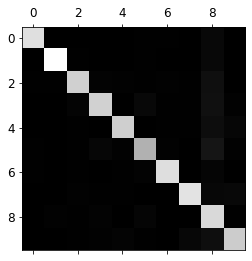

In [131]:
# 숫자가 높을수록 밝은 색을 띔. 대각선에서 어두운 색이 오분류가 많음을 의미.
plt.matshow(conf_mx, cmap=plt.cm.gray)
save_fig("confusion_matrix_plot", tight_layout=False)
plt.show()

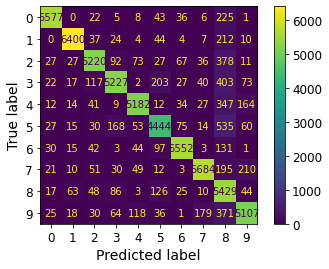

In [132]:
# 싸이킷런이 제공하는 클래스를 이용하는 방법.
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay(conf_mx).plot()
#ConfusionMatrixDisplay(conf_mx).plot(cmap=plt.cm.gray)

##### sklearn.metrics.ConfusionMatrixDisplay
class sklearn.metrics.ConfusionMatrixDisplay(confusion_matrix, \*, display_labels=None)<br>
Confusion Matrix visualization.<br>
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html?highlight=confusionmatrixdisplay%20from_predictions<br>

In [133]:
# 이미지의 갯수가 많은 숫자(클래스)는 상대적으로 불리할 수 있으므로, 클래스 별로 이미지의 갯수에 대한 오분류 비율을 계산!
# 같은 행에는 동일한 숫자값이 (열별로 0~9까지)분류된 갯수가 들어있으므로, 한 행의 셀별 갯수를 모두 더하면 해당 이미지의 전체 갯수가 계산됨.
# 이 숫자로 각 셀의 값을 나누면 비율을 구할 수 있음.
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums

Saving figure confusion_matrix_errors_plot


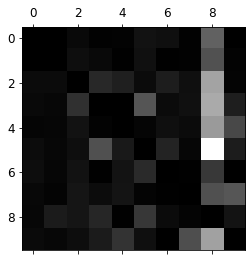

In [134]:
# 대각선은 정분류(제대로 분류)된 값이므로, 오분류에만 집중하기 위해 이를 0으로 채워 black으로 표시.
# 특히, 8로 오분류된 결과가 많음을 알 수 있음: 실제 8이 다른 숫자로 분류된 것이 아니라, 0~9까지의 숫자 중 8이 아닌 값이 8로 잘못 분류.
# 이중에는 특히 5가 8로 잘못 분류된 것이 많다는 것을 알 수 있음 (가장 밝은 색)
# 이렇게 발견된 오분류 패턴에 따라 학습 전략을 수정할 수 있음: 
# 예를 들어, 8이 아니지만 8처럼 보이는 이미지를 더 많이 수집하여 훈련 데이터로 활용
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
save_fig("confusion_matrix_errors_plot", tight_layout=False)
plt.show()

Saving figure error_analysis_digits_plot


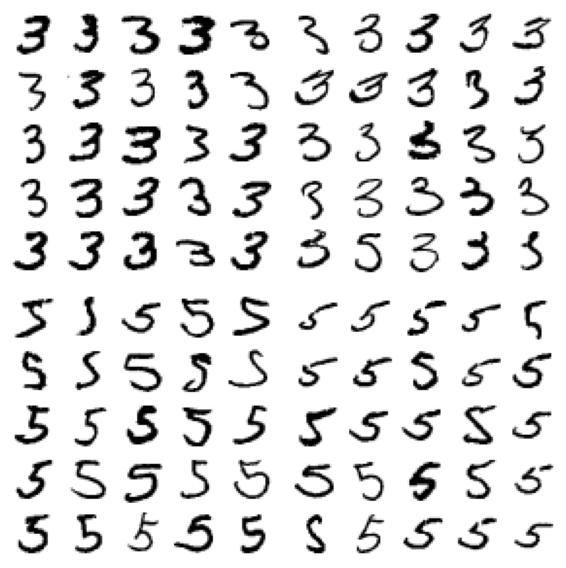

In [135]:
# 3과 5의 경우도 많이 서로 혼동되고 있는 것을 확인할 수 있음.
# 아래의 그림에서 좌측은 3으로, 우측은 5로 분류된 이미지. 상단은 실제 3, 하단은 실제 5.
cl_a, cl_b = 3, 5
X_aa = X_train[(y_train == cl_a) & (y_train_pred == cl_a)]
X_ab = X_train[(y_train == cl_a) & (y_train_pred == cl_b)]
X_ba = X_train[(y_train == cl_b) & (y_train_pred == cl_a)]
X_bb = X_train[(y_train == cl_b) & (y_train_pred == cl_b)]

plt.figure(figsize=(8,8))
plt.subplot(221); plot_digits(X_aa[:25], images_per_row=5)
plt.subplot(222); plot_digits(X_ab[:25], images_per_row=5)
plt.subplot(223); plot_digits(X_ba[:25], images_per_row=5)
plt.subplot(224); plot_digits(X_bb[:25], images_per_row=5)
save_fig("error_analysis_digits_plot")
plt.show()

# 3.6 Multilabel Classification (다중 레이블 분류)

하나의 분류기(classifier)가 여러 개의 클래스를 출력하는 경우. 여러 클래스를 한꺼번에 입력으로 넣어주고 학습을 진행.
즉, 주어진 하나의 인스턴스에 대해 하나가 아닌 여러 개의 레이블을 동시에 학습.

In [136]:
from sklearn.neighbors import KNeighborsClassifier

# 두 개의 클래스를 생성. 클래스1: 큰 수, 클래스2: 홀수
y_train_large = (y_train >= 7)
y_train_odd = (y_train % 2 == 1)
y_multilabel = np.c_[y_train_large, y_train_odd]    # train set has 2 y columns

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)

KNeighborsClassifier()

In [137]:
# 여러 클래스를 포함하는 label (target)
y_multilabel

array([[False,  True],
       [False, False],
       [False, False],
       ...,
       [False,  True],
       [False, False],
       [ True, False]])

In [138]:
# 하나의 레이블만 존재하던 이전의 분류 문제와 비교
y_train_5

array([ True, False, False, ...,  True, False, False])

In [139]:
# 하나의 레이블만 존재하던 이전의 분류 문제와 비교
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [140]:
# 실제값과 레이블 값을 한꺼번에 확인: 1열이 실제값이며, 2, 3열이 학습시킬 레이블
#  np.c_ 얘 되게 좋다
np.c_[y_train, y_multilabel]

array([[5, 0, 1],
       [0, 0, 0],
       [4, 0, 0],
       ...,
       [5, 0, 1],
       [6, 0, 0],
       [8, 1, 0]], dtype=uint8)

In [141]:
knn_clf.predict([some_digit])  # some_digit: '5'
#  예측값이 두개가 나옴

array([[False,  True]])

**Warning**: the following cell may take a very long time (possibly hours depending on your hardware).

In [142]:
y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_multilabel, cv=3)
f1_score(y_multilabel, y_train_knn_pred, average="macro")

0.976410265560605

##### sklearn.metrics.f1_score
sklearn.metrics.f1_score(y_true, y_pred, \*, labels=None, pos_label=1, average='binary', sample_weight=None, zero_division='warn')<br>
Compute the F1 score, also known as balanced F-score or F-measure.<br>
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html?highlight=f1_score<br>

# 3.7 Multioutput Classification (다중 출력 분류) >> 설명안함

In [143]:
noise = np.random.randint(0, 100, (len(X_train), 784))
X_train_mod = X_train + noise
noise = np.random.randint(0, 100, (len(X_test), 784))
X_test_mod = X_test + noise
y_train_mod = X_train
y_test_mod = X_test

##### numpy.random.randint
random.randint(low, high=None, size=None, dtype=int)<br>
Return random integers from low (inclusive) to high (exclusive).<br>
https://numpy.org/doc/stable/reference/random/generated/numpy.random.randint.html?highlight=randint#numpy.random.randint<br>

In [144]:
some_index = 0
X_test[some_index]

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

In [145]:
X_test_mod[some_index]

array([ 21.,  66.,  64.,  33.,  83.,  14.,  36.,  61.,  91.,  56.,  35.,
        67.,  23.,  93.,  66.,  32.,  92.,  27.,  51.,   7.,  27.,   3.,
         5.,  69.,  33.,  29.,  86.,  12.,  53.,   1.,  51.,   5.,   6.,
        88.,  83.,   6.,  93.,   9.,  11.,  99.,  76.,  78.,  26.,  98.,
        83.,  72.,  21.,  97.,  14.,  54.,  27.,  51.,  10.,  27.,  98.,
        82.,  75.,  33.,  97.,  97.,   9.,  87.,  36.,  21.,  75.,  99.,
        91.,  91.,  52.,  70.,  34.,  79.,  60.,  94.,  75.,   9.,  69.,
         5.,  65.,   8.,  75.,  18.,  93.,  37.,  91.,  83.,   2.,  76.,
        22.,  61.,  67.,  62.,  69.,  86.,  90.,  60.,  19.,  65.,  67.,
        26.,  85.,  84.,  10.,  54.,  59.,  86.,  86.,  61.,  94.,   2.,
        25.,  78.,  95.,  47.,   1.,  91.,  49.,  38.,  82.,  91.,   4.,
        37.,  92.,  31.,  78.,  29.,  55.,  45.,  34.,   7.,  25.,  47.,
        54.,   9.,  94.,  66.,  90.,  77.,  94.,  89.,  21.,  81.,  11.,
        47.,   2.,  25.,  25.,  98.,  43.,   6.,  9

Saving figure noisy_digit_example_plot


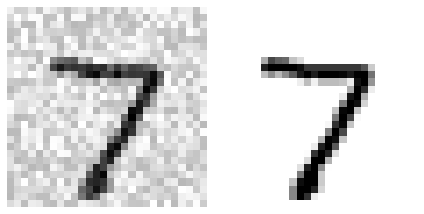

In [146]:
some_index = 0
plt.subplot(121); plot_digit(X_test_mod[some_index])
plt.subplot(122); plot_digit(y_test_mod[some_index])
save_fig("noisy_digit_example_plot")
plt.show()

Saving figure cleaned_digit_example_plot


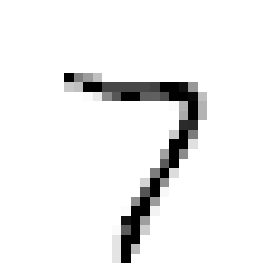

In [147]:
knn_clf.fit(X_train_mod, y_train_mod)
clean_digit = knn_clf.predict([X_test_mod[some_index]])
plot_digit(clean_digit)
save_fig("cleaned_digit_example_plot")

In [148]:
# 이전 학습에서는 하나의 instance가 1개의 레이블을 갖고 있었던 것과 비교하면 차이를 확인할 수 있음.
y_test.shape

(10000,)

In [149]:
# 위의 학습 모델에서는 하나의 instance가 784개의 레이블을 갖고 있음.
y_test_mod.shape

(10000, 784)

In [150]:
# 숫자 하나로 된 레이블을 학습시키는 상황.
y_test[some_index]

7

In [151]:
# 여러(784) 개의 픽셀로 구성된 이미지 하나를 학습시키는 상황.
y_test_mod[0]

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

# Extra material

## Dummy (i.e., random) classifier

In [152]:
from sklearn.dummy import DummyClassifier
dmy_clf = DummyClassifier(strategy="prior")
y_probas_dmy = cross_val_predict(dmy_clf, X_train, y_train_5, cv=3, method="predict_proba")
y_scores_dmy = y_probas_dmy[:, 1]

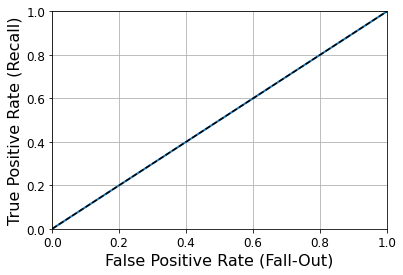

In [153]:
fprr, tprr, thresholdsr = roc_curve(y_train_5, y_scores_dmy)
plot_roc_curve(fprr, tprr)

## KNN classifier

In [154]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier(weights='distance', n_neighbors=4)
knn_clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=4, weights='distance')

In [155]:
y_knn_pred = knn_clf.predict(X_test)

In [156]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_knn_pred)

0.9714

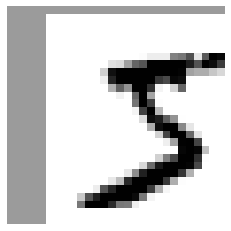

In [157]:
from scipy.ndimage.interpolation import shift
def shift_digit(digit_array, dx, dy, new=0):
    return shift(digit_array.reshape(28, 28), [dy, dx], cval=new).reshape(784)

plot_digit(shift_digit(some_digit, 5, 1, new=100))

In [158]:
X_train_expanded = [X_train]
y_train_expanded = [y_train]
for dx, dy in ((1, 0), (-1, 0), (0, 1), (0, -1)):
    shifted_images = np.apply_along_axis(shift_digit, axis=1, arr=X_train, dx=dx, dy=dy)
    X_train_expanded.append(shifted_images)
    y_train_expanded.append(y_train)

X_train_expanded = np.concatenate(X_train_expanded)
y_train_expanded = np.concatenate(y_train_expanded)
X_train_expanded.shape, y_train_expanded.shape

((300000, 784), (300000,))

In [159]:
knn_clf.fit(X_train_expanded, y_train_expanded)

KNeighborsClassifier(n_neighbors=4, weights='distance')

In [160]:
y_knn_expanded_pred = knn_clf.predict(X_test)

In [161]:
accuracy_score(y_test, y_knn_expanded_pred)

0.9763

In [162]:
ambiguous_digit = X_test[2589]
knn_clf.predict_proba([ambiguous_digit])

array([[0.24579675, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.75420325]])

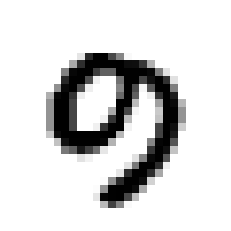

In [163]:
plot_digit(ambiguous_digit)

# Homework Assignment
To be announced soon!